<a href="https://colab.research.google.com/github/aka5hbansal/ML-MODEL-CAT-DOG/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing dataset from kaggle**

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


**opening zip file**

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**importing important libraries**

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

**using generators present in keras for training and validating model to reduce load on RAM**

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


NOMALIZATION

In [12]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**CREATING CNN MODEL AND PASSING THE DATA**

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 2632s 4s/step - loss: 1.0083 - accuracy: 0.5552 - val_loss: 0.6691 - val_accuracy: 0.5544
Epoch 2/10
625/625 [==============================] - 2595s 4s/step - loss: 0.6567 - accuracy: 0.5816 - val_loss: 0.8036 - val_accuracy: 0.6432
Epoch 3/10
625/625 [==============================] - 2565s 4s/step - loss: 0.6221 - accuracy: 0.6414 - val_loss: 0.5240 - val_accuracy: 0.7130
Epoch 4/10
625/625 [==============================] - 2586s 4s/step - loss: 0.5158 - accuracy: 0.7283 - val_loss: 0.6041 - val_accuracy: 0.6856
Epoch 5/10
625/625 [==============================] - 2549s 4s/step - loss: 0.4456 - accuracy: 0.7800 - val_loss: 0.6387 - val_accuracy: 0.6646
Epoch 6/10
625/625 [==============================] - 2564s 4s/step - loss: 0.3842 - accuracy: 0.8101 - val_loss: 0.6322 - val_accuracy: 0.6448
Epoch 7/10
625/625 [==============================] - 2554s 4s/step - loss: 0.3391 - accuracy: 0.8341 - val_loss: 1.3160 - val_accuracy:

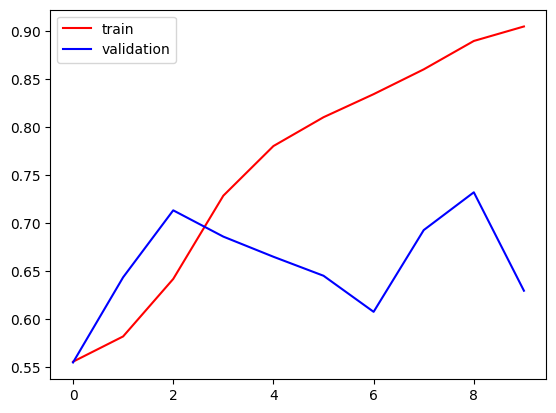

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

1/1 [==============================] - 0s 51ms/step
This is a dog


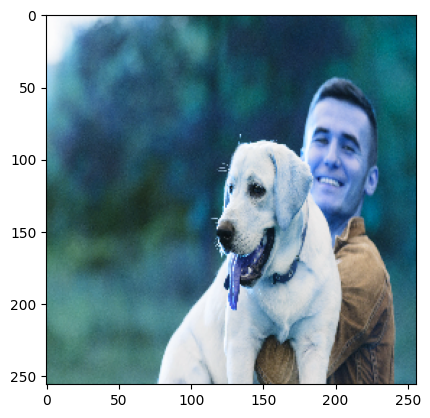

In [34]:
test_img = cv2.imread('/content/guy-holding-his-friend-dog-labrador-smiling-sunset.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
a=model.predict(test_input)
if a==1:
  print("This is a dog")
else:
  print("this is a cat")
plt.imshow(test_img)

1/1 [==============================] - 0s 54ms/step
this is a cat


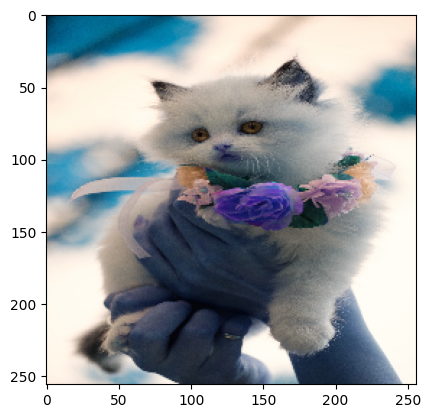

In [35]:
test_img = cv2.imread('/content/pexels-peng-louis-1643457.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
a=model.predict(test_input)
if a==1:
  print("This is a dog")
else:
  print("this is a cat")
plt.imshow(test_img)